In [2]:
# import package
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt



# Preprocessing

In [3]:
# load data
data_asli = pd.read_csv("london_crime_by_lsoa.csv")

# copy data asli
london_crime = data_asli.copy()

In [4]:
# melihat beberapa data teratas
london_crime.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [5]:
# melihat jumlah baris dan kolom
london_crime.shape

(13490604, 7)

In [6]:
# menghapus feature yang tidak digunakan
london_crime.drop(['lsoa_code'], axis=1, inplace=True)

In [7]:
# mengetahui jumlah data null
london_crime.isna().sum()

borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [8]:
# mengetahui informasi tipe data
london_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   borough         object
 1   major_category  object
 2   minor_category  object
 3   value           int64 
 4   year            int64 
 5   month           int64 
dtypes: int64(3), object(3)
memory usage: 617.6+ MB


In [9]:
london_crime.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


# Visualisasi Data

### Line

Pada tahun berapakah terjadi kasus kriminal tertinggi dan terendah ? sertakan jumlahnya

In [10]:
# membuat list dari unique value pada feature 'year'
tahun = london_crime['year'].unique().tolist()
tahun.sort()
#print(tahun)

# membuat data jumlah kriminal dengan pengelompokan tahun
dataTahunan = london_crime.groupby("year").sum()
dataTahunan = dataTahunan['value']
jumlah = dataTahunan
#dataTahunan

C:\Users\unila\AppData\Local\Temp\ipykernel_16664\3331931906.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataTahunan = london_crime.groupby("year").sum()


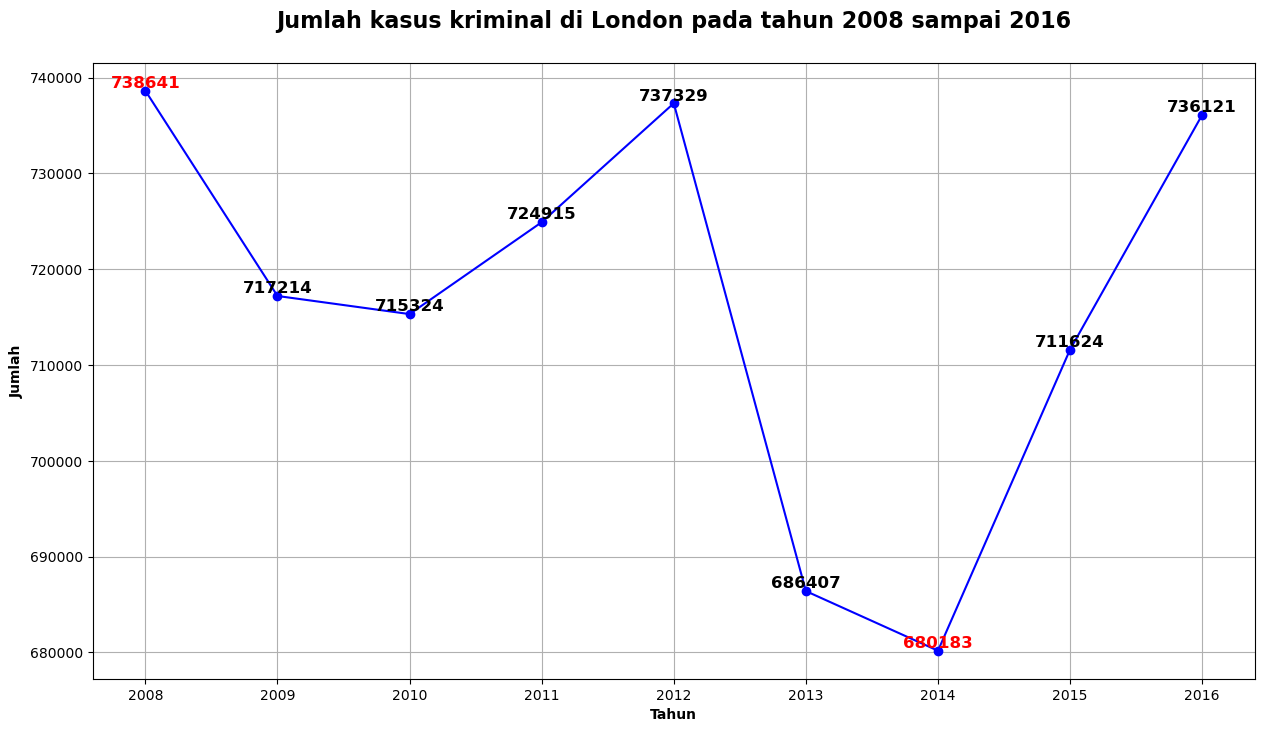

In [11]:
fig, ax = plt.subplots(
    figsize=(15,8)
)

max_value = max(jumlah)
min_value = min(jumlah)

ax.plot(tahun, jumlah,'bo-')

for i, j in zip(tahun, jumlah):
    if j == max_value or j == min_value:
        ax.text(
            i, j, str(j), 
            ha='center', 
            va='bottom',
            fontsize=12,
            fontweight='bold',
            color='red'
            )
    else:
        ax.text(
            i, j, str(j), 
            ha='center', 
            va='bottom',
            fontsize=12,
            fontweight='bold'
            )

ax.set_title(
    "Jumlah kasus kriminal di London pada tahun 2008 sampai 2016\n",
    fontsize=16,
    fontweight='bold'
    )
ax.set_xlabel("Tahun", fontweight='bold')
ax.set_ylabel("Jumlah", fontweight='bold')

ax.grid(True)

plt.show()


Dari grafik diketahui bahwa angka kriminalitas tertinggi terjadi pada tahun 2008 dengan jumlah kasus 738461,
kemudian untuk angka kriminalitas terendah terjadi pada tahun 2014 dengan jumlah kasus 680183.

### Bar chart

Code Review : Mengimplementasikan Bar Chart Menggunakan `Matplotlib` Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik.

Analysis : Menarik Informasi/Kesimpulan Berdasarkan Bar Chart Yang Telah Student Buat

Borough mana yang memiliki angka kriminalitas tertinggi di London ?

In [12]:
# Load data dari file CSV
london_crime = data_asli.copy()

lokasi = london_crime.groupby('borough').sum()
lokasi = lokasi['value']
lokasi = lokasi.sort_values(ascending=False)

C:\Users\unila\AppData\Local\Temp\ipykernel_16664\4160894051.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  lokasi = london_crime.groupby('borough').sum()


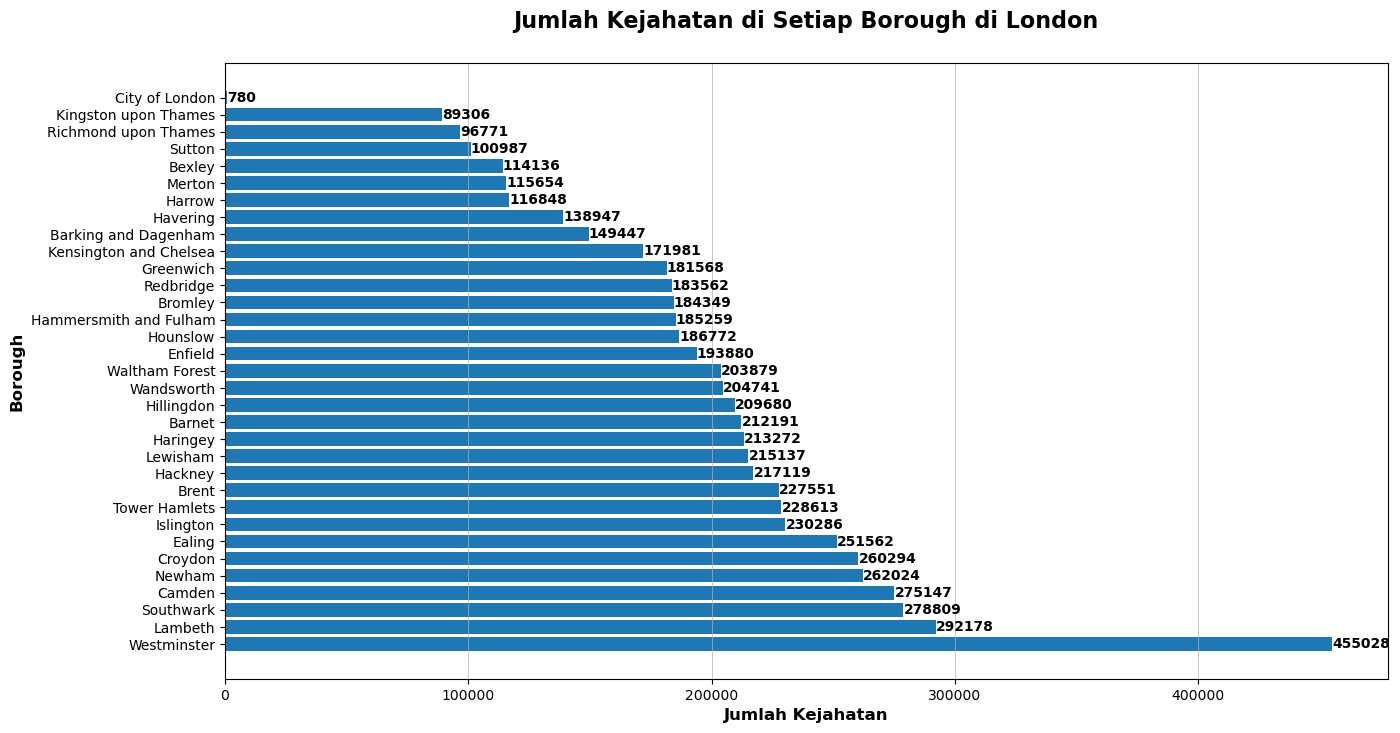

In [13]:
plotLokasi = lokasi.index.values
plotJumlah = lokasi

fig, ax = plt.subplots(figsize=(15, 8))

bars = ax.barh(plotLokasi, plotJumlah)

ax.set_title("Jumlah Kejahatan di Setiap Borough di London\n", fontsize=16, fontweight='bold')
ax.set_ylabel("Borough", fontsize=12, fontweight='bold')
ax.set_xlabel("Jumlah Kejahatan", fontsize=12, fontweight='bold')

# tambahkan label nilai pada setiap bar
for i, bar in enumerate(bars):
    ax.text(bar.get_width() + 50, bar.get_y() + bar.get_height() / 2, plotJumlah[i], va='center', fontweight='bold')

# atur rotasi label x agar tidak bertumpuk
plt.setp(ax.get_yticklabels(), rotation=0, ha='right')

# tambahkan grid
ax.grid(True, axis='x', linewidth=0.5)

plt.show()


Westminster, menjadi kota dengan angka kriminalitas tertinggi di London sepanjang tahun 2008 sampai dengan 2016, dengan jumlah kasus kriminal 445028 kasus.

### Area

Code Review : Mengimplementasikan Area Plot Menggunakan `Matplotlib` Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik

Analysis : Menarik Informasi/Kesimpulan Berdasarkan Area Plot Yang Telah Student Buat

Tunjukkan bagaimana tren kejahatan di 5 borough dengan jumlah kasus tertinggi dibandingkan dengan rata-rata kejahatan di Kota London !

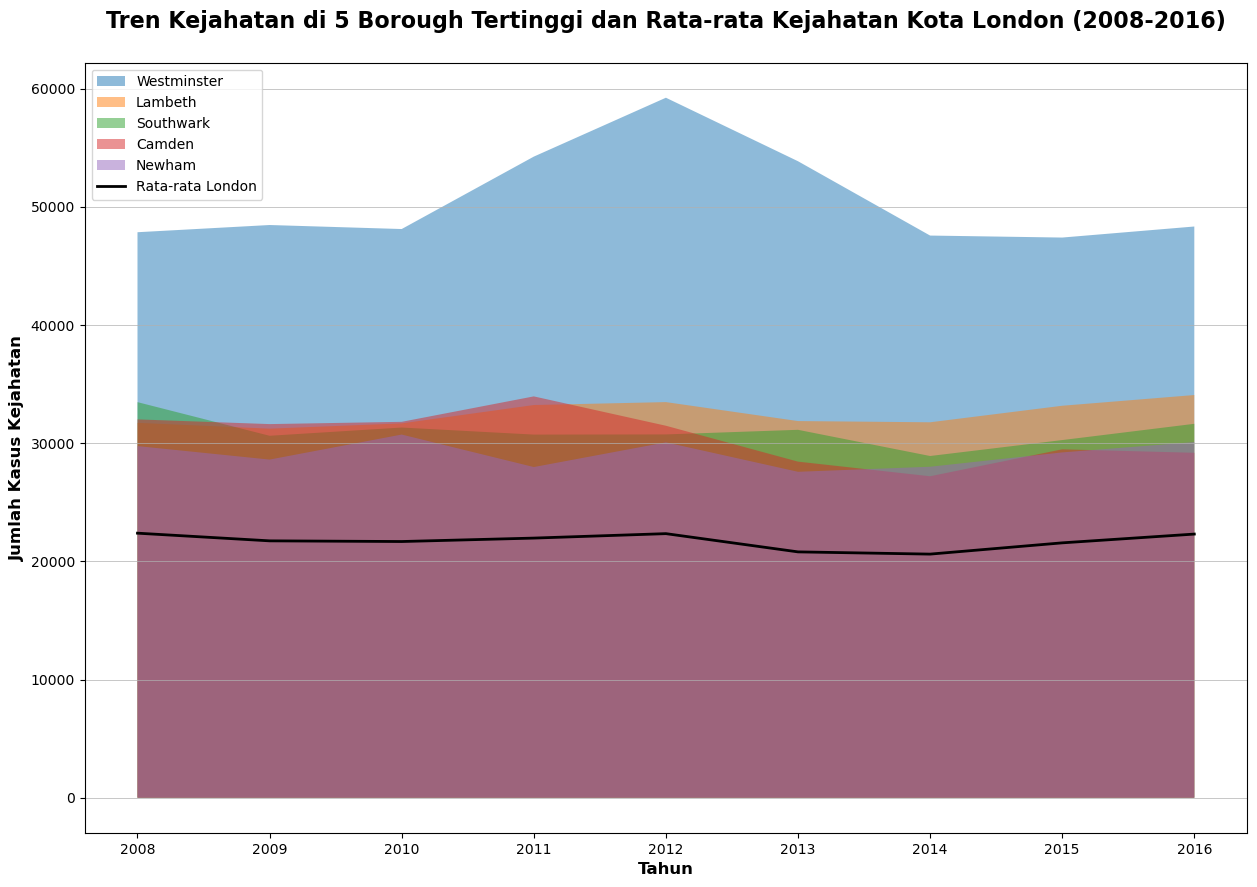

In [14]:
# Load data dari file CSV
london_crime = data_asli.copy()

# Filter data untuk rentang waktu yang diinginkan
dataKejahatan = london_crime[london_crime['year'].between(2008, 2016)]

# Hitung total kasus kejahatan tahunan untuk masing-masing borough
kejahatanBorough = dataKejahatan.groupby(['borough', 'year'])['value'].sum().reset_index()

# Hitung total kasus kejahatan tahunan untuk setiap borough
totalKejahatanBorough = kejahatanBorough.groupby('borough')['value'].sum()

# Hitung rata-rata tahunan untuk seluruh kota London
rataRataKejahatanLondon = kejahatanBorough.groupby('year')['value'].sum() / len(kejahatanBorough['borough'].unique())

# Urutkan borough-borough berdasarkan total kasus kejahatan tahunan secara menurun
boroughTertinggi = totalKejahatanBorough.sort_values(ascending=False).index[:5]

# Filter data untuk 5 borough tertinggi
dataBoroughTertinggi = kejahatanBorough[kejahatanBorough['borough'].isin(boroughTertinggi)]

# Buat plot area
fig, ax = plt.subplots(figsize=(15, 10))

# Loop melalui masing-masing borough untuk membuat plot area
for borough in boroughTertinggi:
    dataBorough = dataBoroughTertinggi[dataBoroughTertinggi['borough'] == borough]
    ax.fill_between(dataBorough['year'], dataBorough['value'], alpha=0.5, label=borough)

# Tambahkan plot area untuk rata-rata kejahatan kota London
ax.plot(rataRataKejahatanLondon.index, rataRataKejahatanLondon.values, color='black', linewidth=2, label='Rata-rata London')

# Atur judul dan label sumbu
ax.set_title('Tren Kejahatan di 5 Borough Tertinggi dan Rata-rata Kejahatan Kota London (2008-2016)\n', fontsize=16, fontweight='bold')
ax.set_xlabel('Tahun', fontsize=12, fontweight='bold')
ax.set_ylabel('Jumlah Kasus Kejahatan', fontsize=12, fontweight='bold')

# Tambahkan legenda dan grid
ax.legend(loc='upper left')
ax.grid(True, axis='y', linewidth=0.5)

plt.show()


Terlihat pada grafik bahwa kelima borough selalu memiliki jumlah kasus kriminal di atas rata-rata kasus kriminal Kota London. Westminster menjadi borough dengan penyumbang kasus kriminal terbanyak di setiap tahunnya di Kota London ditambah lagi dengan selisih jumlah kasus yang cukup signifikan dibandingkan dengan borough lainnya.

### Histogram

Code Review : Mengimplementasikan Histogram Menggunakan `Matplotlib` Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik.

Analysis : Menarik Informasi/Kesimpulan Berdasarkan Histogram Yang Telah Student Buat

Bagaimana distribusi rata-rata tahunan jumlah kejahatan di setiap borough di London ?

C:\Users\unila\AppData\Local\Temp\ipykernel_16664\2071085750.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataBorough = london_crime.groupby('borough').sum()


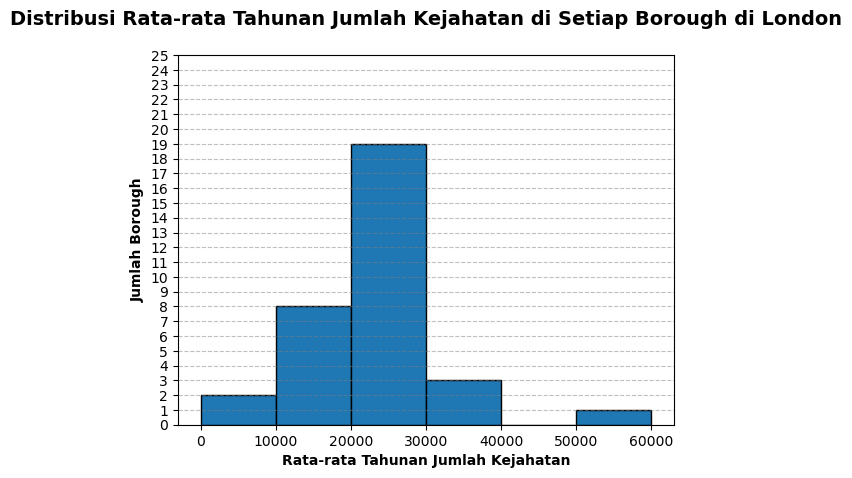

In [15]:
# Copy data ke DataFrame baru
london_crime = data_asli.copy()

tahun = london_crime['year'].unique().tolist()
tahun.sort()

dataBorough = london_crime.groupby('borough').sum()
dataBorough = dataBorough['value']
rata2Tahunan = dataBorough / len(tahun)
rata2Tahunan = rata2Tahunan.astype(int)
rata2Tahunan = rata2Tahunan.sort_values()


# Buat histogram dengan rentang yang diberikan
bins = [0, 10000, 20000, 30000, 40000, 50000,60000]

plt.hist(rata2Tahunan, bins=bins, edgecolor='black')
plt.xlabel('Rata-rata Tahunan Jumlah Kejahatan', fontsize=10, fontweight='bold')
plt.ylabel('Jumlah Borough', fontsize=10, fontweight='bold')
plt.title('Distribusi Rata-rata Tahunan Jumlah Kejahatan di Setiap Borough di London\n', fontsize=14, fontweight='bold')

plt.grid(axis='y', which='major', color='gray', linestyle='--', alpha=0.5)

plt.yticks(range(0, 26))

plt.show()

Dari histogram di atas diketahui bahwa 
- ada 2 borough yang memiliki rentang kasus kejahatan antara 0 - 10000, 
- ada 8 borough dengan rentang kasus kejahatan 10000 - 20000, 
- ada 19 borough dengan rentang kasus kejahatan 20000 - 30000,
- ada 3 borough dengan rentang kasus kejahatan 30000 - 40000,
- ada 1 borough dengan rentang kasus kejahatan 50000 - 60000.

Total semua borough di Kota London ada 33 Borough.

### Pie chart

Code Review : Mengimplementasikan Pie Chart Menggunakan `Matplotlib` Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik.

Analysis : Menarik Informasi/Kesimpulan Berdasarkan Pie Chart Yang Telah Student Buat

Apa jenis kejahatan yang paling dominan di London berdasarkan persentase ?

In [16]:
# Load data dari file CSV
london_crime = data_asli.copy()

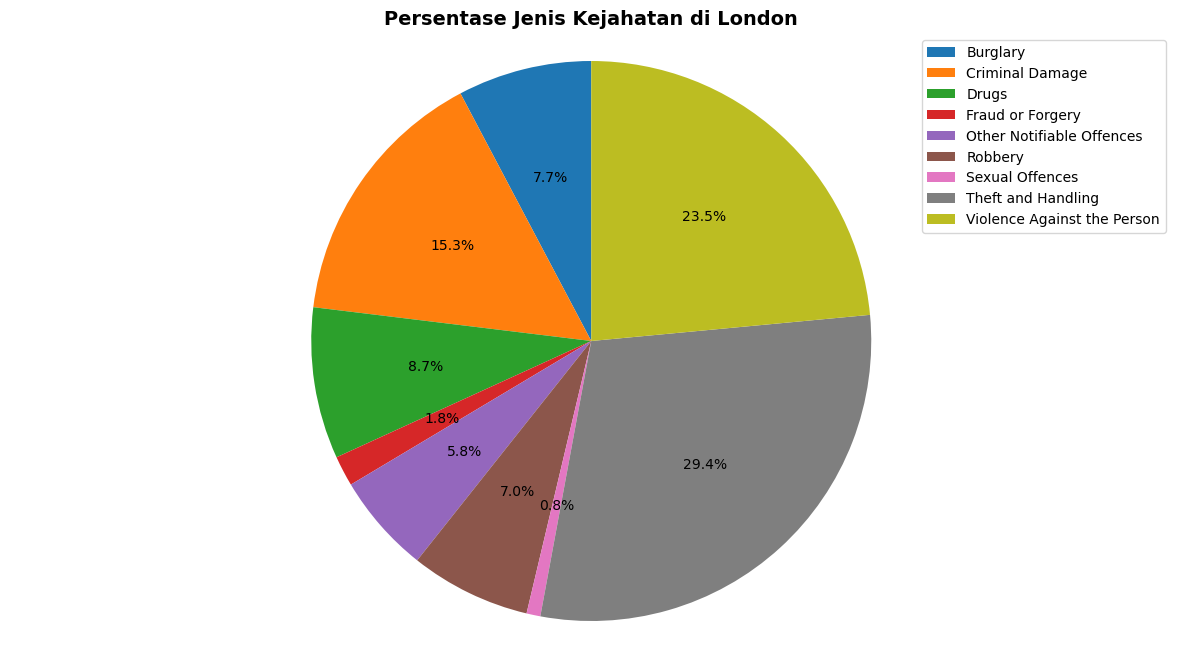

In [17]:
# Hitung jumlah kejahatan per jenis kejahatan
crime_counts = london_crime['major_category'].value_counts().sort_index()

# Buat pie chart
plt.figure(figsize=(15, 8))
plt.pie(crime_counts, labels=None, autopct='%1.1f%%', startangle=90)
plt.title('Persentase Jenis Kejahatan di London', fontsize=14, fontweight='bold')

plt.axis('equal')  # Agar pie chart terlihat sebagai lingkaran

# Tambahkan legenda
plt.legend(labels=crime_counts.index, loc='best')

plt.show()

Berdasarka grafik di atas diketahui bahwa jenis kejahatan yang paling tinggi di Kota London adalah jenis kejahatan "Theft and Handling", dengan persentase 29,4%. Jenis kejahatan ini merujuk pencurian dan penadahan barang. Kemudian disusul di urutan kedua oleh violence against the person dengan 23,5%. Jenis kejahatan ini merupakan kejahatan-kejahatan yang melibatkan kekerasan fisik atau ancaman kekerasan terhadap orang-orang.

### Box plot

Code Review : Mengimplementasikan Box Plot Menggunakan `Matplotlib` Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik.

Analysis : Menarik Informasi/Kesimpulan Berdasarkan Box Plot Yang Telah Student Buat

Bagaimana sebaran data jumlah kejahatan di London berdasarkan tahun dan bulan ?

C:\Users\unila\AppData\Local\Temp\ipykernel_16664\2383254767.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataGrup = london_crime.groupby(['year','month']).sum()


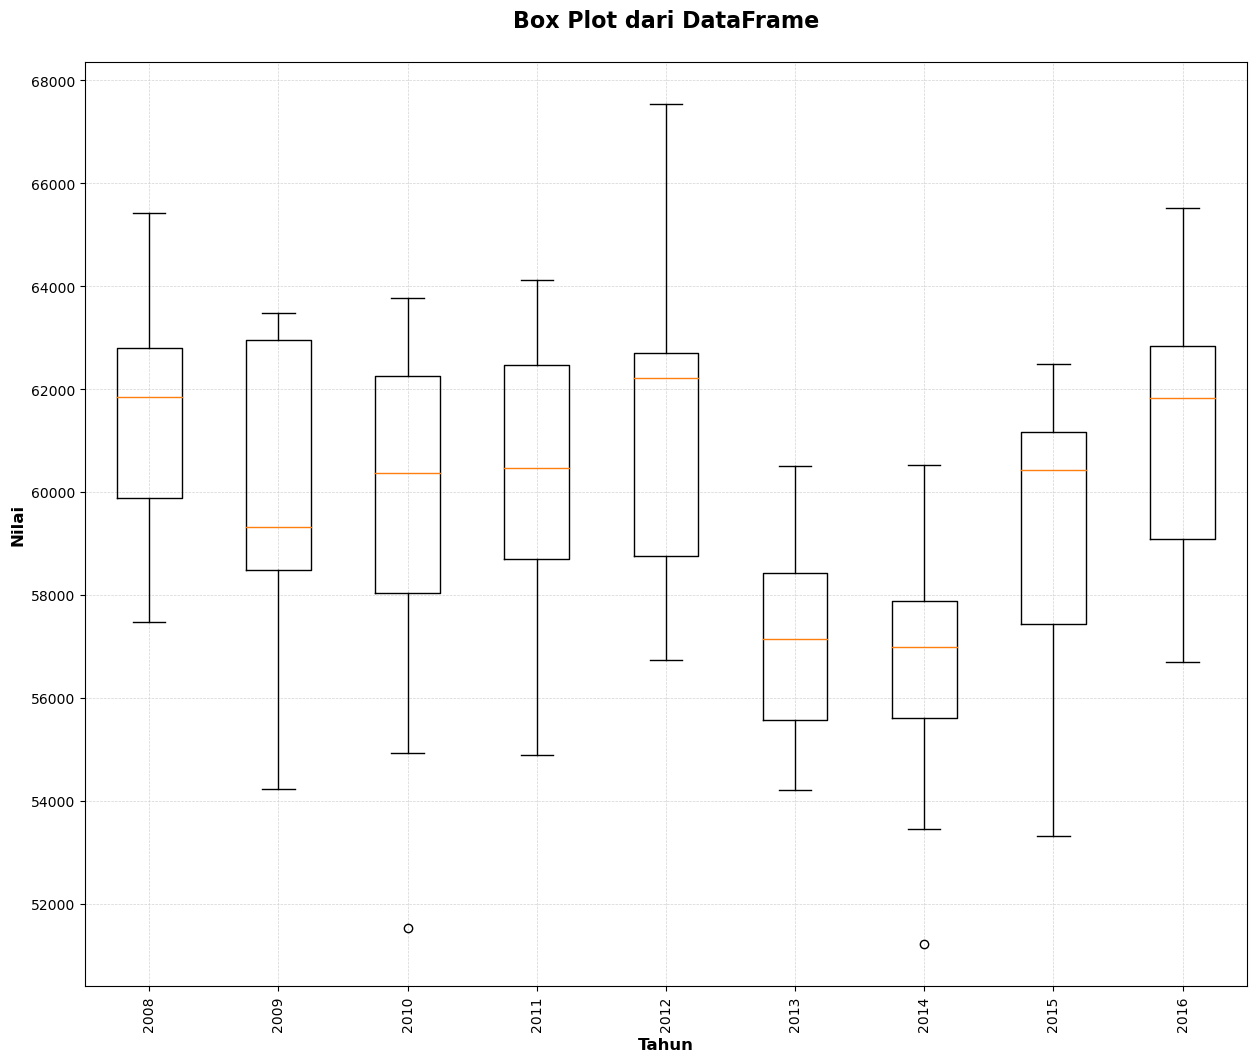

In [18]:
london_crime = data_asli.copy()

dataGrup = london_crime.groupby(['year','month']).sum()
dataGrup = dataGrup.unstack()
dataGrup = dataGrup.transpose()

# Membuat box plot dengan matplotlib
plt.figure(figsize=(15, 12))  # Ukuran plot dalam inches
plt.boxplot(dataGrup.values)

# Mengatur label sumbu x
plt.xticks(range(1, len(dataGrup.columns) + 1), dataGrup.columns, rotation=90)

plt.title("Box Plot dari DataFrame\n", fontsize=16, fontweight='bold')
plt.xlabel("Tahun", fontsize=12, fontweight='bold')
plt.ylabel("Nilai", fontsize=12, fontweight='bold')
plt.grid(True, linestyle='dashed', linewidth=0.5, color='lightgray')
plt.show()

Penjelasan analisis belum

### Scatter plot

In [19]:
london_crime = data_asli.copy()
london_crime

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [20]:
london_crime = data_asli.copy()

london_crime['series'] = pd.to_datetime(london_crime['year'].astype(str) + "-" + london_crime['month'].astype(str))
london_crime =  london_crime.sort_values('series', ascending=True)
london_crime = london_crime.drop(['lsoa_code','minor_category', 'year', 'month'], axis=1)
london_crime = london_crime[london_crime['borough'] == 'City of London']
london_crime = london_crime.drop('borough', axis=1)
london_crime = london_crime.groupby(['series', 'major_category'])['value'].sum().reset_index()

london_crime

,series,major_category,value
0,2008-01-01,Burglary,0
1,2008-01-01,Criminal Damage,0
2,2008-01-01,Drugs,0
3,2008-01-01,Other Notifiable Offences,0
4,2008-01-01,Robbery,0
...,...,...,...
751,2016-12-01,Drugs,1
752,2016-12-01,Other Notifiable Offences,1
753,2016-12-01,Robbery,0
754,2016-12-01,Theft and Handling,31


In [21]:
# # Membuat contoh dataframe

# data = {
#     'kategori': london_crime['major_category'],
#     'kolom_x': london_crime['series'],
#     'kolom_y': london_crime['value']
# }
# london_crime = london_crime[london_crime['major_category'] == 'Theft and Handling']

# dataframe = pd.DataFrame(data)

# # Mendefinisikan kategori
# kategori = dataframe['kategori'].unique()

# # Mengatur warna atau simbol untuk setiap kategori
# colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'pink', 'brown', 'lime']

# plt.figure(figsize=(25, 15))

# # Membuat scatter plot dengan kategori
# for i, kategori in enumerate(kategori):
#     data = dataframe[dataframe['kategori'] == kategori]
#     plt.scatter(data['kolom_x'], data['kolom_y'], color=colors[i % len(colors)], label=kategori)

# # Menambahkan legenda dan mengatur ukuran legenda
# plt.legend(prop={'size': 20})

# # Memberikan label pada sumbu x dan y
# plt.xlabel('Kolom X', fontsize=25)
# plt.ylabel('Kolom Y', fontsize=25)

# # Mengatur ukuran font tick pada sumbu x dan y
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)

# plt.grid(True)

# # Menampilkan scatter plot
# plt.show()


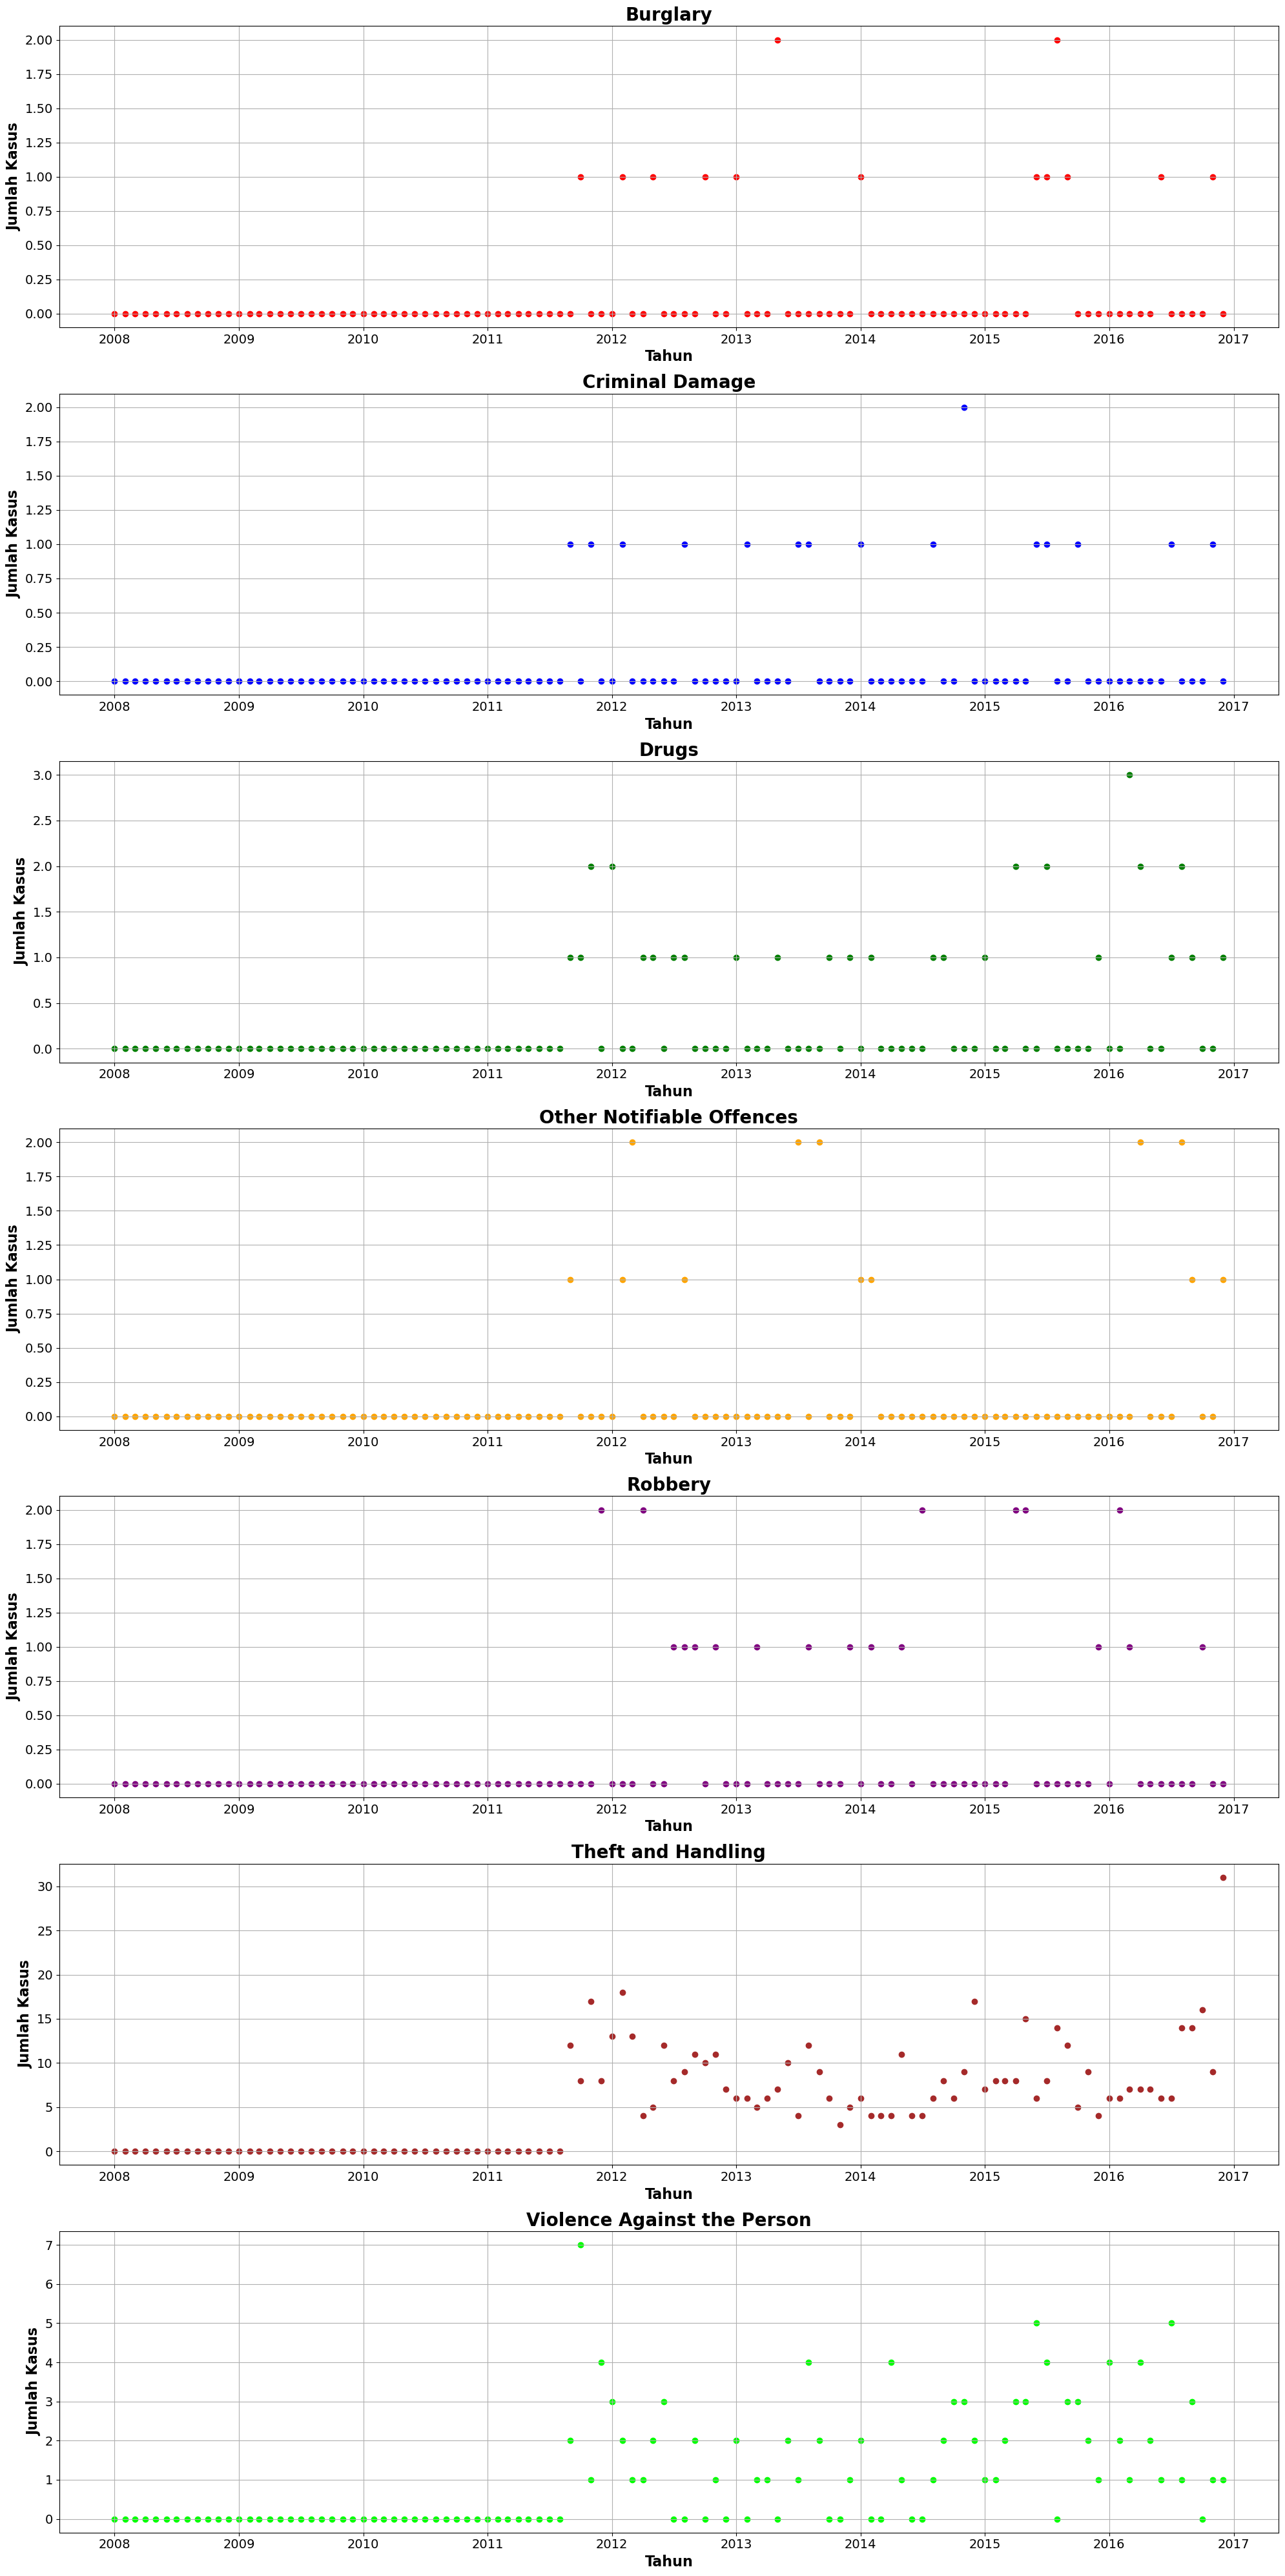

In [22]:
# Membuat contoh dataframe
data = {
    'kategori': london_crime['major_category'],
    'kolom_x': london_crime['series'],
    'kolom_y': london_crime['value']
}

dataframe = pd.DataFrame(data)

# Mengambil kategori major_category unik
categories = dataframe['kategori'].unique()

# Mengatur jumlah baris dan kolom subplot sesuai dengan jumlah kategori
num_rows = len(categories)
num_cols = 1

# Mengatur ukuran keseluruhan gambar (figure)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 40))

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'lime']
# Membuat scatter plot untuk setiap major_category
for i, category in enumerate(categories):
    # Mengambil data untuk major_category tertentu
    data = dataframe[dataframe['kategori'] == category]
    
    # Menentukan indeks kolom subplot
    col = i
    
    # Membuat scatter plot pada subplot yang sesuai
    axes[col].scatter(data['kolom_x'], data['kolom_y'], color=colors[i % len(colors)], label=category)
    axes[col].set_title(category)
    
    # Menambahkan judul pada subplot
    axes[col].set_title(category, fontsize=20, fontweight='bold')
    
    # Memberikan label pada sumbu x dan y
    axes[col].set_xlabel('Tahun', fontsize=16, fontweight='bold')
    axes[col].set_ylabel('Jumlah Kasus', fontsize=16, fontweight='bold')
    
    # Mengatur ukuran font tick pada sumbu x dan y
    axes[col].tick_params(axis='x', labelsize=14)
    axes[col].tick_params(axis='y', labelsize=14)
    
    axes[col].grid(True)

# Mengatur tata letak subplot
fig.tight_layout()

# Menampilkan gambar (figure) dengan semua subplot
plt.show()


### Word clouds

In [23]:
london_crime = data_asli.copy()
london_crime = london_crime.drop(['lsoa_code', 'borough', 'major_category', 'year', 'month'], axis=1)

london_crime
crime_list = []

for i,j in london_crime.values:
    while j > 0:
        crime_list.append(i)

### Folium